<a href="https://colab.research.google.com/github/Berubell9/Bellweb/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


# อ่านไฟล์ CSV
* Library คือ **pandas** 

In [58]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Covert DataType
* `คอลัม.astype(' typeที่จะให้เปลี่ยน ')` = เปลี่ยน Type ของข้อมูล

In [59]:
df.RowNumber      = df.RowNumber.astype('category')
df.CustomerId     = df.CustomerId.astype('category')
df.HasCrCard      = df.HasCrCard.astype('category')
df.IsActiveMember = df.IsActiveMember.astype('category')
df.Exited         = df.Exited.astype('category')
df.NumOfProducts  = df.NumOfProducts.astype('category')
df.Geography      = df.Geography.astype('category')
df.Surname        = df.Surname.astype('category')
df.Gender         = df.Gender.astype('category')

In [60]:
df.dtypes

RowNumber          category
CustomerId         category
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [61]:
df.describe(include = 'category')

,RowNumber,CustomerId,Surname,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,2932,3,2,4,2,2,2
top,1,15565701,Smith,France,Male,1,1,1,0
freq,1,1,32,5014,5457,5084,7055,5151,7963


# Bar charts
* `.plot.bar()` = เเสดงกราฟเเท่ง
* `.plot.bar(grid = True)` = พอตกราฟเเท่งมีตาราง Grid

In [62]:
count_Geography = df.Geography.value_counts()

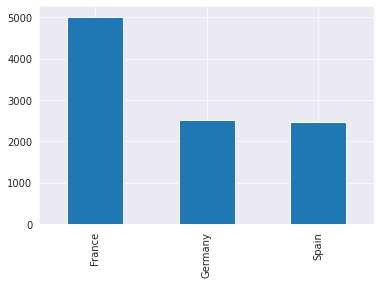

In [63]:
count_Geography.plot.bar()

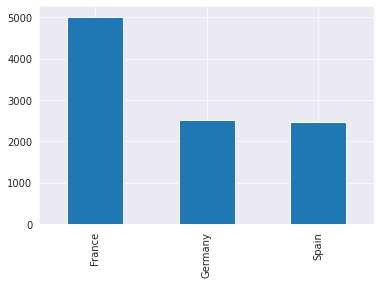

In [64]:
count_Geography.plot.bar(grid = True)

# Bar Charts ฉบับตกเเต่ง
* Library คือ matplotlib
`import matplotlib.pyplot as plt` ใช้สำหรับเเสดงกราฟ
* Library คือ seaborn `import seaborn as sns` ใช้ร่วมกับ matplotlib เพื่อตกเเต่งกราฟิกของกราฟทางสถิติให้น่าสนใจ และเเสดงข้อมูล
* `fig, axarr = plt.subplots(เเถว,คอลัม,figsize = (20,12))` = เเยกกราฟ `plt.subplots()` ตามเเถว เเละคอลัมที่กำหนด
* `sns.countplot()` = เเสดงกราฟเเท่งในตารางของ `fig, axarr = plt.subplots(เเถว,คอลัม,figsize = (20,12))`



In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

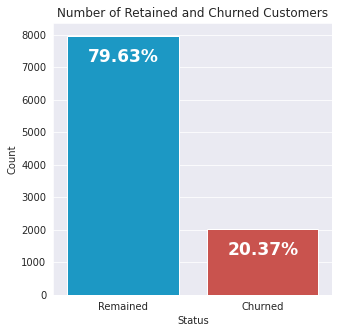

In [66]:
# พื้นหลังเป็น Grid สีเทา
sns.set_style('darkgrid')
# สีเเท่งกราฟ
colors = ['#00A5E0', '#DD403A']
# ขนาดจตุรัส 5*5
fig = plt.figure(figsize = (5, 5))
# พอตกราฟเเท่งในคอลัม Exited ที่มี data มาจาก df
sns.countplot(x = 'Exited', data = df, palette = colors)

for index, value in enumerate(df['Exited'].value_counts()):
  # เเปลงเลขที่เเสดงในเเท่งกราฟเป็น %
  label = '{}%'.format(round( (value/df['Exited'].shape[0])*100, 2))
  # ตำเเหน่ง สี ความหนา ขนาด ของเลขที่เเสดงในเเท่งกราฟ
  plt.annotate(label, xy = (index -0.25, value -800), color = 'w',fontweight='bold',size=17)

# หัวข้อ
plt.title('Number of Retained and Churned Customers')
# ชื่อของเเท่งกราฟ
plt.xticks([0, 1], ['Remained', 'Churned'])
# ชื่อของเเกน X
plt.xlabel('Status')
# ชื่อของเเกน Y
plt.ylabel('Count');

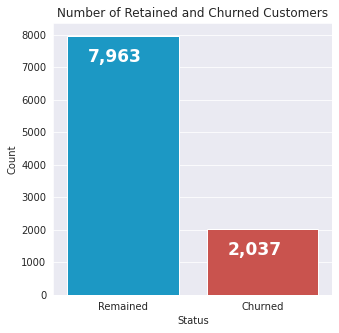

In [67]:
# พื้นหลังเป็น Grid สีเทา
sns.set_style('darkgrid')
# สีเเท่งกราฟ
colors = ['#00A5E0', '#DD403A']
# ขนาดจตุรัส 5*5
fig = plt.figure(figsize = (5, 5))
# พอตกราฟเเท่งในคอลัม Exited ที่มี data มาจาก df
sns.countplot(x = 'Exited', data = df, palette = colors)

for index, value in enumerate(df['Exited'].value_counts()):
  # เเปลงเลขที่เเสดงในเเท่งกราฟเป็น ค่าปกติที่มี , คั่น
  label = '{:,}'.format(value)
  # ตำเเหน่ง สี ความหนา ขนาด ของเลขที่เเสดงในเเท่งกราฟ
  plt.annotate(label, xy = (index -0.25, value -800), color = 'w',fontweight='bold',size=17)

# หัวข้อ
plt.title('Number of Retained and Churned Customers')
# ชื่อของเเท่งกราฟ
plt.xticks([0, 1], ['Remained', 'Churned'])
# ชื่อของเเกน X
plt.xlabel('Status')
# ชื่อของเเกน Y
plt.ylabel('Count');

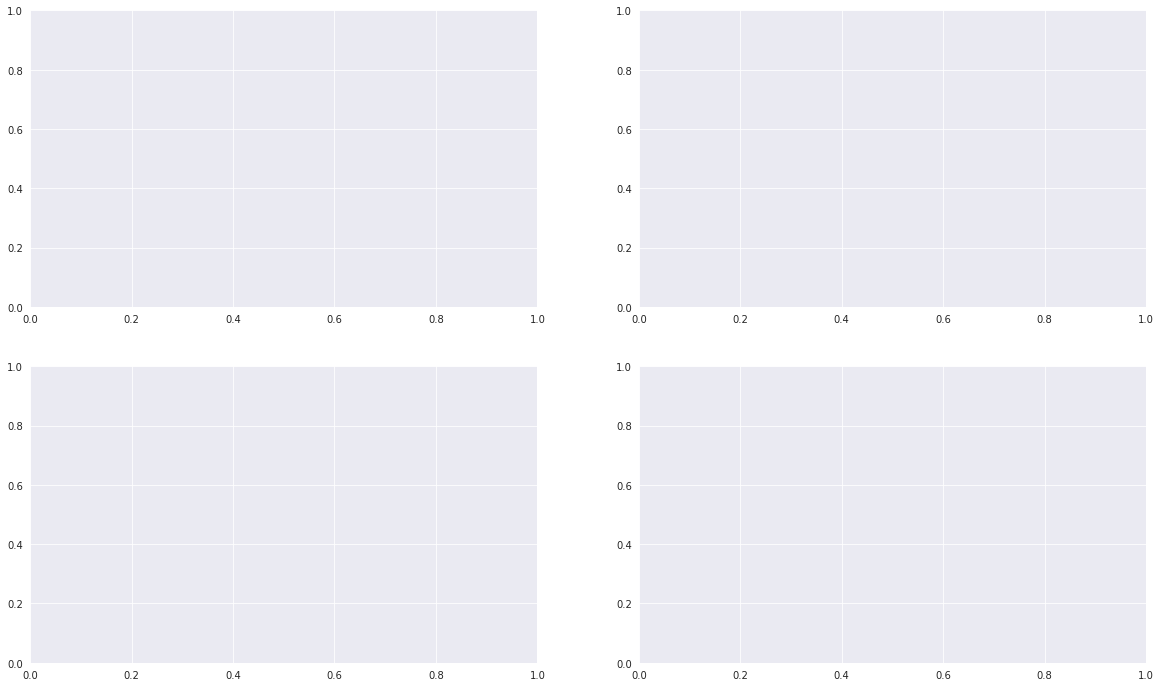

In [68]:
# เเยกกราฟเเท่ง 2เเถว 2คอลัม ขนาด 20*12
fig, axarr = plt.subplots(2,2,figsize = (20,12))

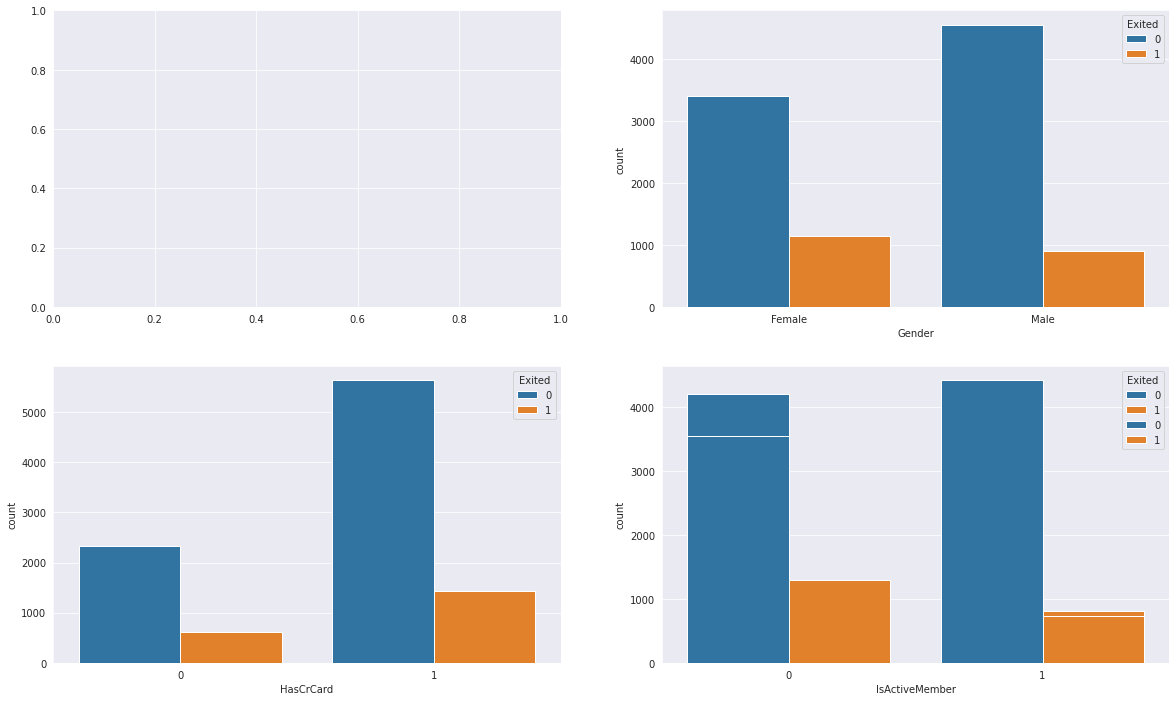

In [69]:
# เเยกกราฟเเท่ง 2เเถว 2คอลัม ขนาด 20*12
fig, axarr = plt.subplots(2,2,figsize = (20,12))
# เเยกจำนวนประเภทของ attribute ในคอลัมตาม Exited | จัดกราฟตามตำเเหน่ง[0][0]
sns.countplot(x = 'Geography', hue = 'Exited' , data = df , )
sns.countplot(x = 'Gender'   , hue = 'Exited' , data = df , ax = axarr[0][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited' , data = df , ax = axarr[1][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited' , data = df , ax = axarr[1][1])

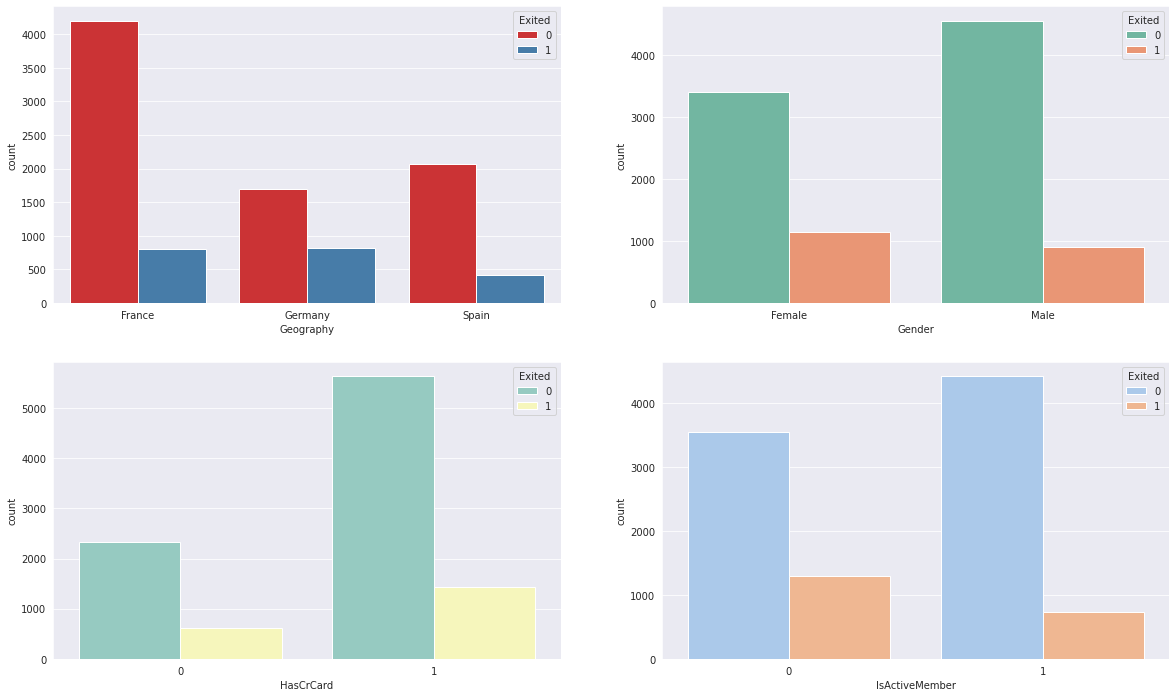

In [70]:
# เเยกกราฟเเท่ง 2เเถว 2คอลัม ขนาด 20*12
fig, axarr = plt.subplots(2,2,figsize = (20,12))
# set1 = เเดงน้ำเงิน
sns.countplot(x = 'Geography', hue = 'Exited' , data = df , ax = axarr[0][0] , palette = "Set1")
# set1 = เขียวส้ม
sns.countplot(x = 'Gender'   , hue = 'Exited' , data = df , ax = axarr[0][1] , palette = "Set2")
# set1 = เขียวเหลือง
sns.countplot(x = 'HasCrCard', hue = 'Exited' , data = df , ax = axarr[1][0] , palette = "Set3")
# pastal = พาลเทล
sns.countplot(x = 'IsActiveMember', hue = 'Exited' , data = df , ax = axarr[1][1] , palette = "pastel")

# Box Plot
* Library คือ matplotlib `import matplotlib.pyplot as plt` ใช้สำหรับเเสดงกราฟ
* Library คือ seaborn `import seaborn as sns` ใช้ร่วมกับ matplotlib เพื่อตกเเต่งกราฟิกของกราฟทางสถิติให้น่าสนใจ และเเสดงข้อมูล
* `sns.boxplot()` = เเสดงกราฟควอไทล์

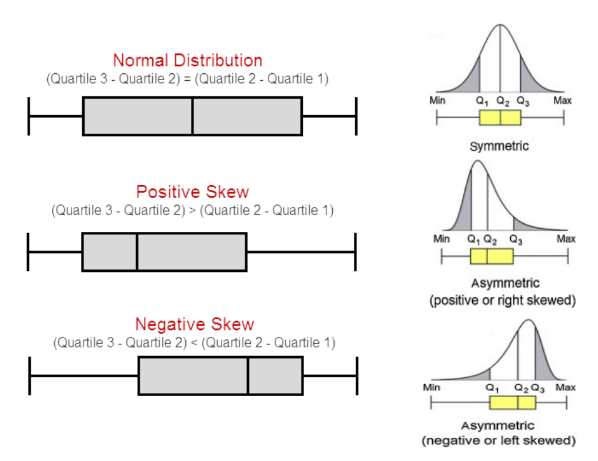

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

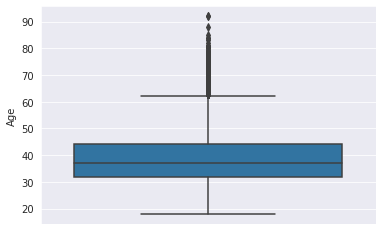

In [72]:
sns.boxplot(y = 'Age' , data = df)

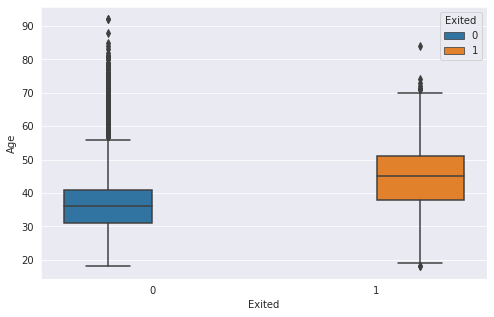

In [73]:
# ขนาดจตุรัส 8*5
fig = plt.figure(figsize = (8, 5))
# กราฟควอไทล์ของอายุเเยกตาม Exited
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df)

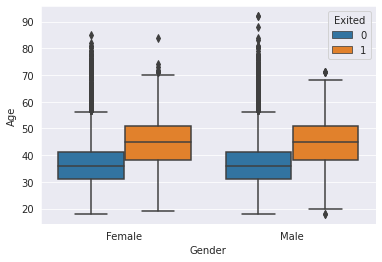

In [74]:
sns.boxplot(y = 'Age',x = 'Gender', hue = 'Exited', data = df)

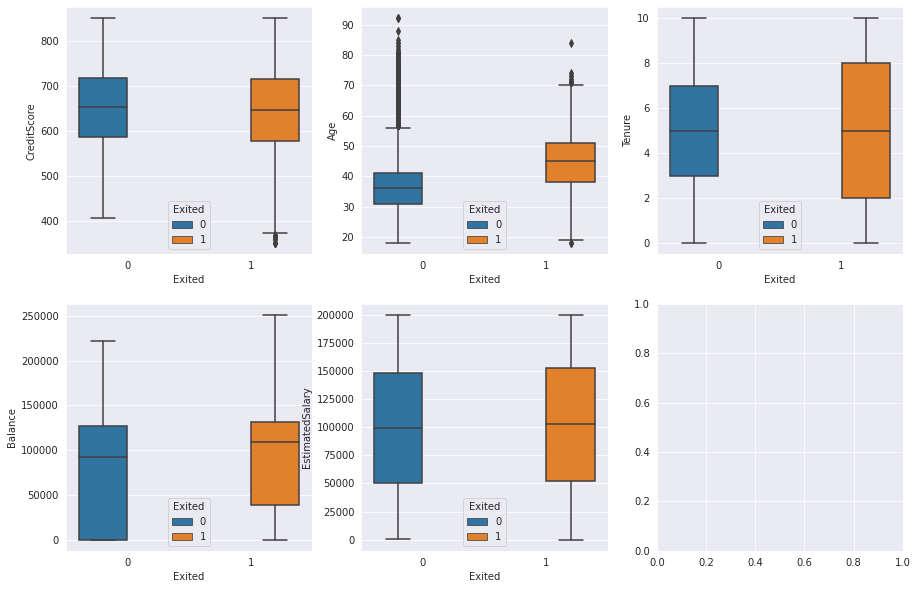

In [75]:
# เเยกกราฟเเท่ง 2เเถว 3คอลัม ขนาด 15*10
fig, axarr = plt.subplots( 2, 3, figsize=(15, 10))
# เเยกจำนวนประเภทของ attribute ในคอลัมตาม Exited | จัดกราฟตามตำเเหน่ง[0][0]
sns.boxplot(y = 'CreditScore',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][0])
sns.boxplot(y = 'Age'        ,x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y = 'Tenure'     ,x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][2])
sns.boxplot(y = 'Balance'    ,x = 'Exited', hue = 'Exited',data = df , ax=axarr[1][0])
sns.boxplot(y = 'EstimatedSalary',x = 'Exited', hue = 'Exited',data = df , ax=axarr[1][1])

# Histogram
* Library คือ matplotlib `import matplotlib.pyplot as plt` ใช้สำหรับเเสดงกราฟ
* Library คือ seaborn `import seaborn as sns` ใช้ร่วมกับ matplotlib เพื่อตกเเต่งกราฟิกของกราฟทางสถิติให้น่าสนใจ และเเสดงข้อมูล
* `sns.histplot()` = เเสดงกราฟ Histogram

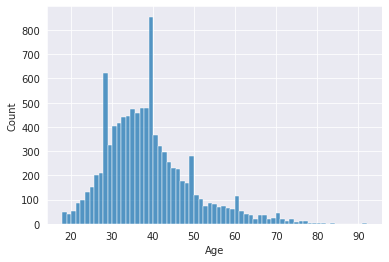

In [76]:
sns.histplot(df, x="Age")

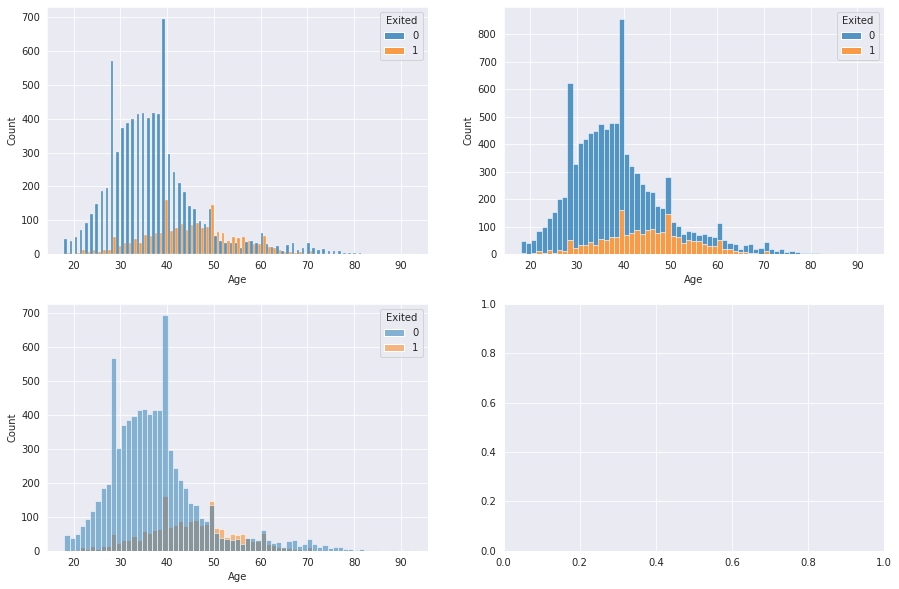

In [77]:
fig, axarr = plt.subplots( 2, 2, figsize=(15, 10))
# กราฟอยู่เเทรกกัน
sns.histplot(df, x = "Age", hue = 'Exited', ax=axarr[0][0] , multiple="dodge")
# กราฟทับ/ซ้อนกัน
sns.histplot(df, x = "Age", hue = 'Exited', ax=axarr[0][1] , multiple="stack")
# กราทับโปร่งใส
sns.histplot(df, x = "Age", hue = 'Exited', ax=axarr[1][0] , multiple="layer")

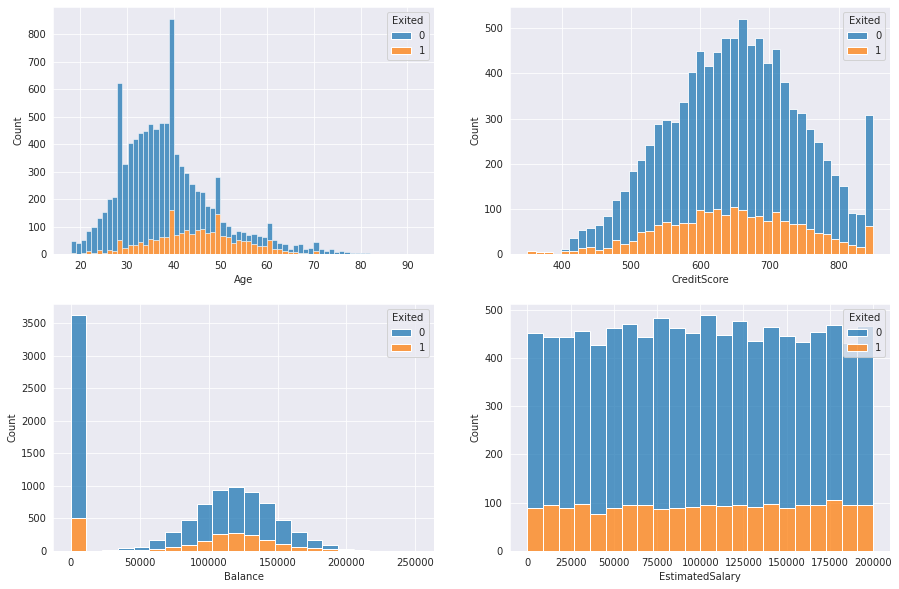

In [78]:
# เเยกกราฟเเท่ง 2เเถว 3คอลัม ขนาด 15*10
fig, axarr = plt.subplots( 2, 2, figsize = (15, 10))
# เเยกจำนวนประเภทของ attribute ในคอลัมตาม Exited | จัดกราฟตามตำเเหน่ง[0][0]
sns.histplot(df, x="Age"             , hue = 'Exited' , multiple="stack", ax=axarr[0][0])
sns.histplot(df, x="CreditScore"     , hue = 'Exited' , multiple="stack", ax=axarr[0][1])
sns.histplot(df, x="Balance"         , hue = 'Exited' , multiple="stack", ax=axarr[1][0])
sns.histplot(df, x="EstimatedSalary" , hue = 'Exited' , multiple="stack", ax=axarr[1][1])